In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install torch-cluster torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-2.6.0+cu124.html
!pip install numpy matplotlib seaborn
!pip install potpourri3d
!pip install einops
!pip install e3nn

Extracting /content/data/ModelNet40/ModelNet40.zip
Processing...
Done!


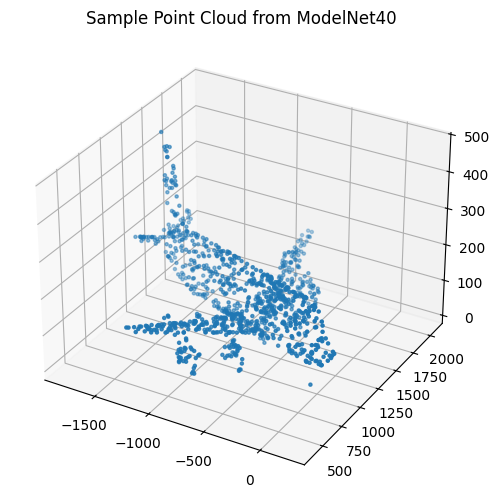

In [ ]:
import os
import numpy as np
import torch
from torch_geometric.datasets import ModelNet
from torch_geometric.transforms import SamplePoints, RandomRotate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load ModelNet40 dataset
path = os.path.join(os.getcwd(), 'data/ModelNet40')
pre_transform = SamplePoints(1024)  # Sample 1024 points from each shape
transform = RandomRotate(180, axis=2)  # Apply random rotations around z-axis

train_dataset = ModelNet(path, '40', True, transform=transform, pre_transform=pre_transform)    # this cell gonna take forever to run!!
test_dataset = ModelNet(path, '40', False, transform=transform, pre_transform=pre_transform)    # but look closely and you'll see an aeroplane

# Visualize a sample point cloud
def visualize_point_cloud(points, title=""):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=5)
    ax.set_title(title)
    plt.show()

sample_data = train_dataset[0]
sample_points = sample_data.pos.numpy()
visualize_point_cloud(sample_points, "Sample Point Cloud from ModelNet40")                     # run the cell multiple time to change orientation of the